<a href="https://colab.research.google.com/github/matheusrangelsa/entrelinhas-sistema-de-recomendacao-conteudo/blob/main/sist_recomend_ideiaglobo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

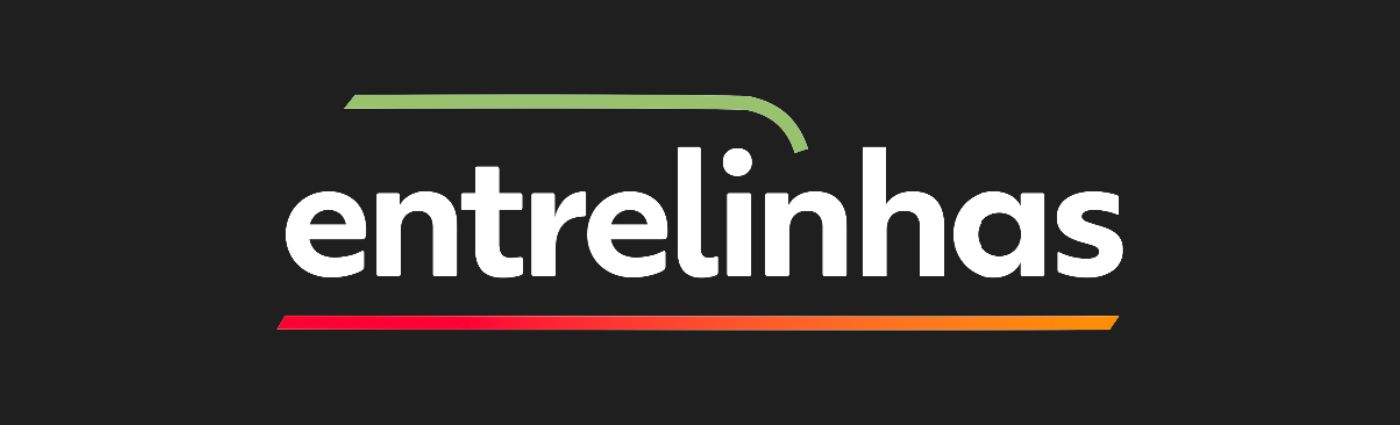


# SISTEMA DE RECOMENDAÇÃO DE FILTRAGEM BASEADA EM CONTEÚDO: Entrelinhas


---



<br>
Etapas do algoritmo:

1.   Ler um arquivo CSV com informações sobre filmes;
2. Solicitar ao usuário o tempo disponível para assistir filmes;
3. Perguntar ao usuário qual dos gêneros de filmes disponíveis é o seu favorito;
4. Aplicar o primeiro filtro e exibir uma lista de filmes que atendam às condições escolhidas;
5. Converter os valores da coluna "Duração" de string para inteiro e adicionar à uma nova lista;
6. Aplicar o segundo filtro que seleciona os filmes cuja soma das durações é menor ou igual ao tempo disponível informado pelo usuário;
7. Otimizar o segundo filtro incluindo um loop while para buscar outras combinações viáveis (quando houver mais de uma opção);
8. Formatar a saída da lista de recomendações de filmes, exibindo apenas o título dos filmes;
9. Perguntar ao usuário se deseja atualizar a recomendação ou encerrar o sistema;
10. Exibir o filtro final com a última recomendação e armazenar a lista final para futuros acessos.

### Acesso ao conjunto de dados usado no código:


---

Link do drive: 
https://drive.google.com/file/d/1VVXR1atDx144TxS1EdjPLXNf3Hrw-ttB/view?usp=sharing

In [4]:
import csv

def read_csv(file_name):
    # Cria uma lista vazia para armazenar os dados lidos do arquivo CSV
    dataset = []
    # Abre o arquivo CSV
    with open(file_name, encoding='utf-8') as file:
        # Cria um leitor de CSV
        reader = csv.DictReader(file)
        # Percorre cada linha no arquivo CSV
        for row in reader:
            # Adiciona a linha lida à lista de dados
            dataset.append(row)
    # Retorna a lista de dados
    return dataset

# Leitura do dataset de filmes
dataset = read_csv('/content/filmes_projeto.csv')



# recebendo input do user
duracao_tempo = int(input('Informe o tempo do seu trajeto no metrô em minutos (apenas números): '))



# seleção de categorias
def genero():
    # Imprime as opções de gênero
    print('\nEscolha os gêneros abaixo digitando os número correspondentes separados por vírgula: \n')
    options = {"1": "Acao", "2": "Comedia", "3": "Drama", "4": "Ficcao Cientifica", 
               "5": "Romance", "6": "Suspense", "7": "Terror", "__________________":""}
    choices = []

    # Percorre cada opção de gênero e imprime na tela
    for key, value in options.items():
        print(f"{key}: {value}")
    
    # Lê a seleção de gêneros feita pelo usuário
    selected = input().split(",")
    selected_options = []

    # Verifica se a seleção do usuário é válida e adiciona à lista de gêneros escolhidos
    for s in selected:
      if s in options:
          selected_options.append(options[s])
    
    # Imprime a lista de gêneros escolhidos ou uma mensagem de erro caso não haja seleções válidas
    if selected_options:
        print(f"\nOpções selecionadas: {selected_options}\n")
    else:
        print("Nenhuma opção válida selecionada.")
    
    return selected_options

# Chamando a função para executá-la
lista_generos = genero()



# Primeiro filtro do dataset com base nos critérios de duração e categorias
def filter_movies(dataset, lista_generos, duracao_tempo):
    # Cria uma lista vazia para armazenar os filmes filtrados
    filtered_movies = []
    # Percorre cada filme no conjunto de dados
    for movie in dataset:
        # Verifica se o gênero do filme está na lista de gêneros escolhidos
        # e se a duração do filme é menor ou igual ao tempo informado
        if movie['Categoria'] in lista_generos and int(movie['Duracao']) <= duracao_tempo:
            # Se as condições forem atendidas, adiciona o filme à lista de filmes filtrados
            filtered_movies.append(movie)
    # Retorna a lista de filmes filtrados
    return filtered_movies

# Armazenamento dos resultados da função
resultado_funcao = filter_movies(dataset, lista_generos, duracao_tempo)
resultados = []
resultados.append(resultado_funcao) 



# Converter os valores da coluna Duracao de str para int e anexar em uma nova lista.
def convert_string_para_inteiro():
  for filmes in resultados:
      for filme in filmes:
          filme['Duracao'] = int(filme['Duracao'])
  return filmes

filtro_inicial = convert_string_para_inteiro()

# ao exibir esse resultado podemos verificar que os valores da coluna Duracao estão sem aspas,
# ou seja, não estão mais no formato de str, mas sim de int.
print(filtro_inicial)



# funcao que filtra a lista de filmes filtro_inicial e retorna apenas o resultado em que 
# as combinacoes sao <= ao tempo informado.
def filmes_por_duracao(filtro_inicial, duracao_tempo):
    # Cria uma lista vazia para armazenar os resultados
    result = []

    # Percorre a lista de filmes
    for filme in filtro_inicial:
        # Verifica se a duração do filme é menor ou igual à duração desejada 
        if filme['Duracao'] <= duracao_tempo:
            # Adiciona o filme à lista de resultados
            result.append(filme)
            # Subtrai a duração do filme da duração desejada
            duracao_tempo -= filme['Duracao']

        # Verifica se a duração desejada já foi atingida
        if duracao_tempo == 0:
            # Interrompe o loop
            break

    # Retorna a lista de resultados
    return result



# FUNCAO QUE PERMITE ATUALIZAR O RESULTADO DA RECOMENDACAO POR UM NOVO (SE HOUVER):
def recomendacoes_filmes(filtro_inicial, duracao_tempo):
    # Inicializa a lista 'combinacoes' vazia
    combinacoes = []

    # Loop que varre a lista de filmes 'filtro_inicial'
    for filme in filtro_inicial:
        # Chama a função 'filmes_por_duracao' para obter uma combinação de filmes
        # que tenham duração igual ou menor a 'duracao_tempo'.
        comb = filmes_por_duracao(filtro_inicial, duracao_tempo)
        # Se houver alguma combinação, adiciona à lista 'combinacoes'
        if comb:
            combinacoes.append(comb)
            # Remove o filme utilizado na combinação da lista 'filtro_inicial'
            filtro_inicial.remove(filme)
    
    # Se não houver mais combinações, exibe mensagem de erro e retorna
    if not combinacoes:
        print("Infelizmente não há mais recomendações para esses critérios")
        return

    else:
      # Inicializa a variável 'combinacao_atual' com 0
      combinacao_atual = 0
      # Loop que varre a lista 'combinacoes'
      while combinacao_atual < len(combinacoes):
          # Exibe a mensagem "Recomendação de filmes:"
          print("\nRecomendações exclusivas para você assistir no seu trajeto! \n")
          print('________________________________________________')
          print('|                                               |')
          print('| SEUS FILMES:                                  |')
          print('|_______________________________________________|')
          print('|                                               |')
          # Loop que varre a combinação atual
          for filme in combinacoes[combinacao_atual]:
            print('| {:46}|'.format(filme['Nome']))
           
          print('|-----------------------------------------------|') 
          
          # Incrementa a variável 'combinacao_atual'
          combinacao_atual += 1
          # Verifica se ainda há mais combinações
          if combinacao_atual < len(combinacoes):
              # Se sim, solicita ao usuário se ele deseja ver mais recomendações
              continuar = input("\n\nDeseja ver mais recomendações? (S/N)\n\n").strip().upper()
              # Se o usuário responder N, interrompe o loop
              if continuar != "S":
                  break
      # Exibe a mensagem "Fim das recomendações"
      print("\n\nFim das recomendações.")
      print("\n\nENTRELINHAS,\n" 
            "COM VOCÊ EM TODO O TRAJETO!")

recomendacoes_filmes(filtro_inicial, duracao_tempo)


Informe o tempo do seu trajeto no metrô em minutos (apenas números): 96

Escolha os gêneros abaixo digitando os número correspondentes separados por vírgula: 

1: Acao
2: Comedia
3: Drama
4: Ficcao Cientifica
5: Romance
6: Suspense
7: Terror
__________________: 
3

Opções selecionadas: ['Drama']

[{'Nome': 'The Throne', 'Categoria': 'Drama', 'Duracao': 74}, {'Nome': '6 Years', 'Categoria': 'Drama', 'Duracao': 79}, {'Nome': 'Sentinelle', 'Categoria': 'Drama', 'Duracao': 80}, {'Nome': 'Crossroads: One Two Jaga', 'Categoria': 'Drama', 'Duracao': 81}, {'Nome': 'Gandu', 'Categoria': 'Drama', 'Duracao': 85}, {'Nome': 'A Man Returned', 'Categoria': 'Drama', 'Duracao': 30}, {'Nome': 'Two Distant Strangers', 'Categoria': 'Drama', 'Duracao': 32}, {'Nome': 'The Characters of the Continent', 'Categoria': 'Drama', 'Duracao': 9}]

Recomendações exclusivas para você assistir no seu trajeto! 

________________________________________________
|                                               |
| SEUS FIL